In [47]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, ActivityRegularization, BatchNormalization, Conv1D, AveragePooling1D, Flatten
from keras import regularizers
from keras.optimizers import Adamax
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

janela = 9 #valor impar
size = int(janela/2) #tamanho a ser incrementado nas laterais


In [48]:
def load(X):
    data = X['prot']
    classes = X['class']
    positions = {'A':0,'C':1,'D':2,'E':3,'F':4,'G':5,'H':6,'I':7,'K':8,'L':9,'M':10,'N':11,
                 'P':12,'Q':13,'R':14,'S':15,'T':16,'V':17,'W':18,'Y':19}
    classes_converter = {'-': 0, 'E':1, 'H':2}
    res = []
    for i in range(len(data)):
        for j in range(len(data[i])):
            res.append(int(positions[data[i][j]])+1)
    for i in range(size):
        res.insert(0, 0)
        res.append(0)
    data =[]
    for i in range(len(X['prot'])):
        data.append(res[i:janela+i])
        data[i].append(classes_converter[classes[i]])
    columns = [[]]*(janela+1)
    for i in range(janela):
        columns[i] = "Element" + str(i)
    columns[janela] = 'Class'
    data = pd.DataFrame(data, columns = columns)
    return data

def load_data():
    proteins = pd.read_csv('cb513.csv',sep='\s*,\s*')
    res = load(proteins.iloc[0])
    for i in range(1,len(proteins)):
        aux = load(proteins.iloc[i])
        res = res.append(aux,ignore_index = True)
    return res

D:\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:26: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


0.4143489518082352
0.2382861438236031
0.3473649043681617


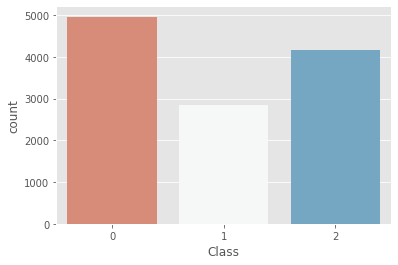

In [77]:
data = load_data()

coil = data.loc[data['Class'] == 0]
fita = data.loc[data['Class'] == 1]
helice = data.loc[data['Class'] == 2]

print(len(coil)/len(data))
print(len(fita)/len(data))
print(len(helice)/len(data))
sns.countplot(x='Class', data=data, palette='RdBu')


In [78]:
X = data.drop(['Class'], axis=1)
y = data['Class']


for column in X.columns:
    X[column] = X[column]/max(X[column])

X = np.asarray(X)
X = X.reshape(len(X), janela, 1)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

(11973, 9, 1)


In [79]:
model = Sequential()
reg = 0.01
model.add(Conv1D(128,(1),input_shape=(janela,1),kernel_regularizer=regularizers.l2(reg),activation='sigmoid'))
model.add(Conv1D(256,(1),kernel_regularizer=regularizers.l2(reg),activation='sigmoid'))
model.add(Conv1D(512,(5),kernel_regularizer=regularizers.l2(reg),activation='sigmoid'))
model.add(Conv1D(1024,(5),kernel_regularizer=regularizers.l2(reg),activation='sigmoid'))
model.add(AveragePooling1D(1))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1024,activation='relu',name="first_fc_layer",kernel_regularizer=regularizers.l2(reg)))
model.add(Dense(2048,activation='relu',name="second_fc_layer",kernel_regularizer=regularizers.l2(reg)))
model.add(Dense(1024,activation='relu',name="third_fc_layer",kernel_regularizer=regularizers.l2(reg)))

model.add(Dense(3, activation='relu',kernel_regularizer=regularizers.l2(reg)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 9, 128)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9, 256)            33024     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 512)            655872    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1, 1024)           2622464   
_________________________________________________________________
average_pooling1d_1 (Average (None, 1, 1024)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1024)           4096      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [86]:
data = y_train

coil = [x for x in data if list(x) == [1,0,0]]
fita = [x for x in data if list(x) == [0,1,0]]
helice = [x for x in data if list(x) == [0,0,1]]

print(len(coil))
print(len(fita))
print(len(helice))
sns.countplot(x='Class', data=data, palette='RdBu')

3993
2272
3313


AttributeError: 'numpy.ndarray' object has no attribute 'get'

(11973, 9, 1)
Train on 9578 samples, validate on 2395 samples
Epoch 1/10
9578/9578 [==============================] - 7s 680us/step - loss: 45.2944 - acc: 0.3627 - val_loss: 36.0679 - val_acc: 0.33400s - loss: 45.6063 - acc: 0.36
Epoch 2/10
9578/9578 [==============================] - 1s 95us/step - loss: 31.5803 - acc: 0.4122 - val_loss: 26.5258 - val_acc: 0.4217
Epoch 3/10
9578/9578 [==============================] - 1s 95us/step - loss: 23.9859 - acc: 0.4132 - val_loss: 21.0358 - val_acc: 0.3340
Epoch 4/10
9578/9578 [==============================] - 1s 95us/step - loss: 19.4116 - acc: 0.4120 - val_loss: 17.4516 - val_acc: 0.4217
Epoch 5/10
9578/9578 [==============================] - 1s 96us/step - loss: 16.2893 - acc: 0.4138 - val_loss: 14.8587 - val_acc: 0.4217
Epoch 6/10
9578/9578 [==============================] - 1s 96us/step - loss: 13.9725 - acc: 0.4125 - val_loss: 12.8748 - val_acc: 0.4217
Epoch 7/10
9578/9578 [==============================] - 1s 97us/step - loss: 12.1730 

D:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


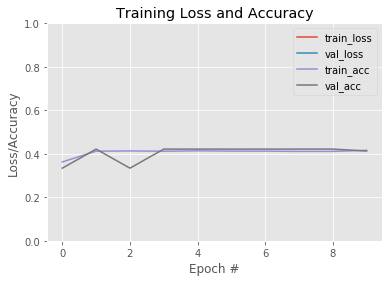

In [74]:
epochs = 10
batch_size=1024

model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

predictions = model.predict(X_test, batch_size=batch_size)
value = classification_report(y_test.argmax(axis=1),
                                  predictions.argmax(axis=1))
print(value)


# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
#plt.xscale('log')
#plt.yscale('log')
plt.ylim((0,1))
plt.plot(np.arange(0,epochs), hist.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), hist.history["acc"],label="train_acc")
plt.plot(np.arange(0,epochs), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [75]:
from keras import backend as k
k.clear_session()

In [53]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(['Class'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))


[[679  71 220]
 [297 153 149]
 [334  87 405]]
              precision    recall  f1-score   support

           0       0.52      0.70      0.60       970
           1       0.49      0.26      0.34       599
           2       0.52      0.49      0.51       826

    accuracy                           0.52      2395
   macro avg       0.51      0.48      0.48      2395
weighted avg       0.51      0.52      0.50      2395

